# **Curso IA desde Cero**

* Dr. Irvin Hussein López Nava
* M.C. Joan M. Raygoza Romero

## Librerias

In [55]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern

## Cargar imagen

Los valores van de 0–255.

Una imagen RGB tiene 3 canales (rojo, verde, azul).

En OpenCV se cargan como BGR por defecto.

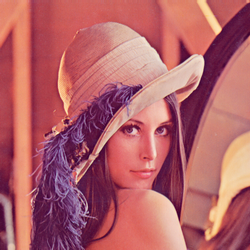

(250, 250, 3)


In [9]:
img = cv2.imread('Lenna.png')

cv2_imshow(img)
print(img.shape)

## Cambiar de espacio de color
Cambiar el espacio de color significa reinterpretar cómo representamos el color de cada píxel.
Es como ver una imagen con “lentes diferentes”.

* RGB/BGR: mezcla de Rojo, Verde y Azul.
* GRAY: solo intensidad (como una foto en blanco y negro).
* HSV: separa color (H), intensidad de color (S) y luz (V).
* LAB: similar a cómo el ojo humano percibe el color.

¿Para qué sirve?

* HSV facilita detectar colores específicos.
* GRAY simplifica tareas como bordes o umbralización.
* LAB es útil para corrección de color.

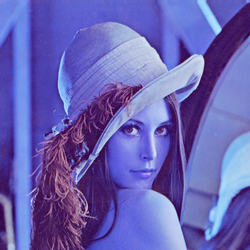

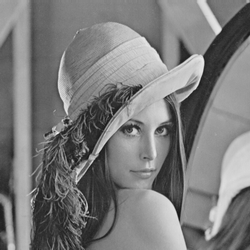

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img_rgb)
cv2_imshow(img_gray)

### Otra manera de visualizar una imagen

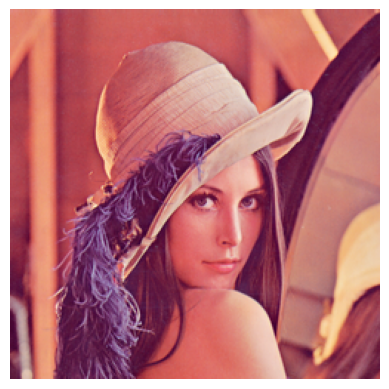

In [11]:
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

## Recorte de una imagen
Recortar es como “cortar con tijeras” una región de la imagen.
¿Para qué sirve?

* Extraer un objeto de interés
* Reducir ruido o partes irrelevantes
* Preparar datasets más limpios

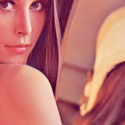

In [13]:
recorte = img[125:250, 125:250]
cv2_imshow(recorte)

## Redimensionar

Redimensionar cambia el tamaño de la imagen.
Es como estirar o encoger una foto sin cambiar su contenido.

¿Para qué sirve?

* Ajustar imágenes para modelos de IA (ej. 224×224)
* Hacer más livianos los datos
* Estandarizar tamaños en un dataset

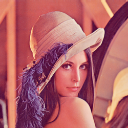

In [14]:
img_resize = cv2.resize(img, (128, 128))
cv2_imshow(img_resize)

## Rotar y voltear (transformaciones geométricas)
Rotar = girar la imagen.

Voltear = reflejarla como si fuera un espejo.

¿Para qué sirve?

* Aumentar datos (data augmentation)
* Corregir orientación incorrecta
* Analizar simetrías

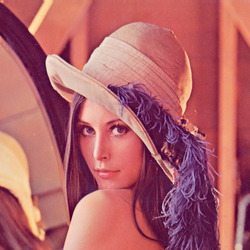

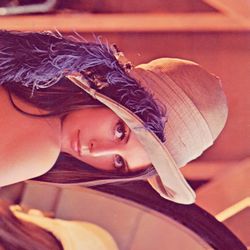

In [15]:
flip_horizontal = cv2.flip(img, 1)
rotada = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

cv2_imshow(flip_horizontal)
cv2_imshow(rotada)

## Ajustar brillo y contraste
Brillo = qué tan clara u oscura está la imagen.

Contraste = qué tanto se distinguen las diferencias entre tonos.

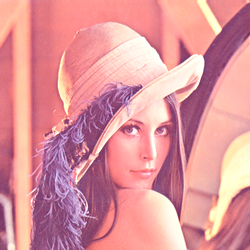

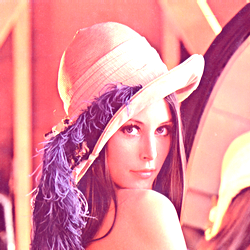

In [16]:
brillo = cv2.convertScaleAbs(img, alpha=1, beta=50)  # beta = brillo
contraste = cv2.convertScaleAbs(img, alpha=1.5, beta=0)  # alpha = contraste

cv2_imshow(brillo)
cv2_imshow(contraste)

## Aplicar desenfoque (filtro suavizado)
Desenfocar suaviza la imagen, reduciendo ruido y detalles.

¿Para qué sirve?

* Limpiar ruido antes de detectar bordes
* Crear efectos visuales
* Suavizar transiciones bruscas

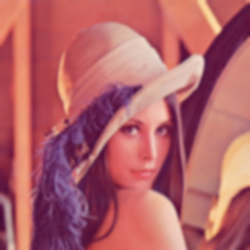

In [23]:
blur = cv2.GaussianBlur(img, (7, 7), 0)
cv2_imshow(blur)

## Detección de bordes (Edge Detection)
Los bordes son cambios bruscos en la imagen → contornos, líneas.
¿Para qué sirve?

* Encontrar siluetas
* Detección de objetos
* Reconocimiento de dígitos o texto

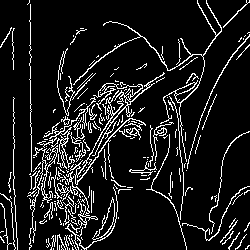

In [32]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bordes = cv2.Canny(img_gray, 100, 150)

cv2_imshow(bordes)

## Umbralización
Convierte la imagen a blanco y negro dependiendo de un valor límite.
¿Para qué sirve?

* Separar objeto/fondo
* Segmentar formas
* Preparar imágenes para OCR (lectura de texto)

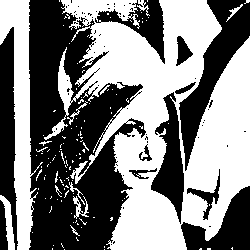

In [48]:
_, binaria = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binaria)

# Descriptores Visuales
**Las imágenes son datos enormes:** cada imagen puede tener miles o millones de píxeles.

Un algoritmo no “ve” una imagen como nosotros; para él solo son matrices de números.

Para que una computadora pueda entender, comparar o clasificar imágenes, necesitamos transformar esos píxeles en información más compacta, útil y significativa.

Eso es un descriptor visual.

## Histogramas de color
El histograma muestra cuántos píxeles tienen cada nivel de intensidad.

¿Para qué sirve?

* Entender distribución de luces/oscuridad

* Detectar imágenes muy oscuras o quemadas

* Usar como descriptor visual simple

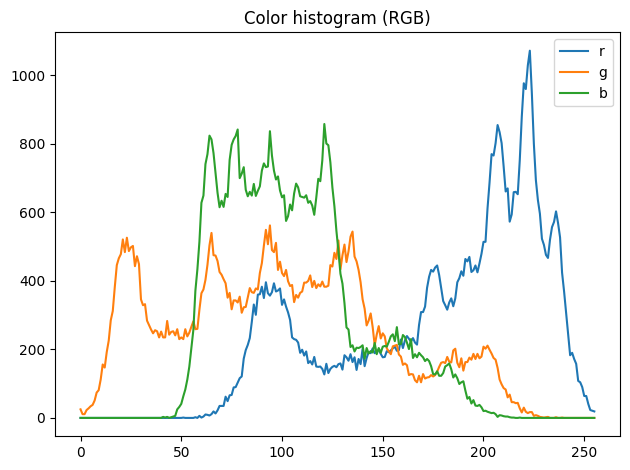

In [54]:
colors = ('r','g','b')
for i, c in enumerate(colors):
    hist = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.plot(hist, label=c)
plt.title("Color histogram (RGB)")
plt.legend(); plt.tight_layout()

## Local Binary Patterns (LBP)
LBP describe la textura comparando cada píxel con sus vecinos.

* Si el vecino es mayor → 1

* Si es menor → 0

* Ese patrón binario se convierte en un número

¿Para qué sirve?

* Reconocimiento facial

* Descripción de texturas

* Clasificación de superficies

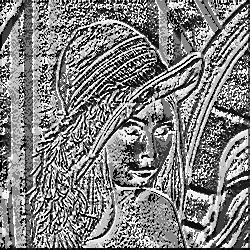

In [77]:
P, R = 8, 2
lbp = local_binary_pattern(img_gray, P, R)
cv2_imshow(lbp)

## Momentos Hu
Describen la forma de un objeto y son invariantes a:

* rotación
* traslación
* escala

Son 7 números derivados de los momentos de la imagen.

¿Para qué sirve?

* Reconocer dígitos

* Analizar contornos

* Clasificación basada en forma

In [72]:
m = cv2.moments(img_gray)
hu = cv2.HuMoments(m).flatten()
hu_log = -np.sign(hu) * np.log10(np.abs(hu) + 1e-12)

print("Momentos de Hu (log):")
print(hu_log)

Momentos de Hu (log):
[  2.87417968   8.16814214  11.65903443  10.90224433 -12.
 -11.99961829  12.        ]
